In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

from skimage import data
from skimage.color import rgb2gray
from scipy.ndimage import convolve

In [2]:
caller=getattr(data,'chelsea')
image=caller()
image
#image=imread('./utcn-cluj1.png')
#image

array([[[143, 120, 104],
        [143, 120, 104],
        [141, 118, 102],
        ...,
        [ 45,  27,  13],
        [ 45,  27,  13],
        [ 45,  27,  13]],

       [[146, 123, 107],
        [145, 122, 106],
        [143, 120, 104],
        ...,
        [ 46,  29,  13],
        [ 45,  29,  13],
        [ 47,  30,  14]],

       [[148, 126, 112],
        [147, 125, 111],
        [146, 122, 109],
        ...,
        [ 48,  28,  17],
        [ 49,  29,  18],
        [ 50,  30,  19]],

       ...,

       [[ 92,  58,  30],
        [105,  71,  43],
        [132,  98,  71],
        ...,
        [172, 145, 138],
        [172, 145, 138],
        [172, 145, 138]],

       [[128,  92,  60],
        [139, 103,  71],
        [134,  95,  64],
        ...,
        [166, 142, 132],
        [166, 142, 132],
        [167, 143, 133]],

       [[139, 103,  71],
        [127,  88,  57],
        [125,  86,  53],
        ...,
        [161, 137, 127],
        [161, 137, 127],
        [162, 138, 128]]

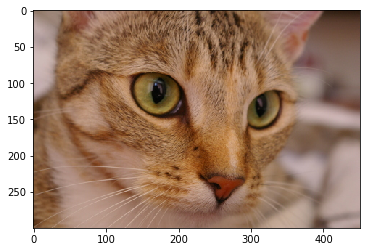

In [3]:
plt.imshow(image)
plt.show()

In [4]:
grayscale_image=rgb2gray(image)
grayscale_image.shape, image.shape

((300, 451), (300, 451, 3))

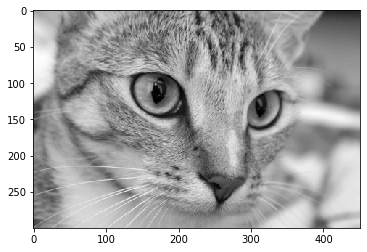

In [8]:
plt.imshow(grayscale_image, cmap=plt.cm.gray)
plt.show()

Sobel operator, sometimes called the Sobel–Feldman operator or Sobel filter, is used in image processing and computer vision, particularly within edge detection algorithms where it creates an image emphasising edges. (wikipedia)

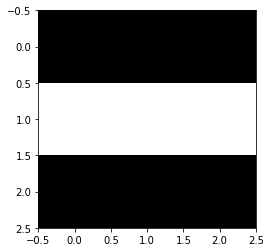

In [50]:
 
kernel=np.array([[-1,-1,-1],[2,2,2], [-1,-1,-1]])
#kernel2=np.array([[-1,2,-1],[-1,2,-1], [-1,2,-1]])
plt.imshow(kernel, cmap=plt.cm.gray)
plt.show()

In [51]:
image_kernel1=convolve(grayscale_image, kernel)

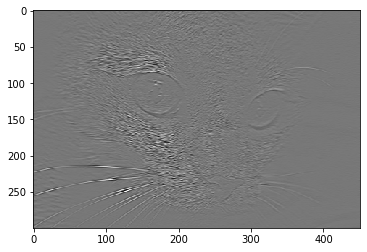

In [52]:
plt.imshow(image_kernel1, cmap=plt.cm.gray)
plt.show()

In [13]:
image_kernel1[0:,0:]

array([[0.93908941, 0.96654039, 0.92732471, ..., 0.21311608, 0.21142667,
        0.2075051 ],
       [1.00263804, 1.00068863, 0.9634451 , ..., 0.25545922, 0.24374   ,
        0.27310275],
       [1.03101961, 1.03691333, 0.98976353, ..., 0.20968392, 0.22871843,
        0.25560392],
       ...,
       [0.15341176, 0.40076118, 1.21146235, ..., 1.17679176, 1.17396353,
        1.17396353],
       [0.99759137, 1.27858314, 1.08603765, ..., 1.16547686, 1.15371216,
        1.18116314],
       [1.04810353, 0.65808784, 0.66984627, ..., 1.05227137, 1.03826667,
        1.06179608]])

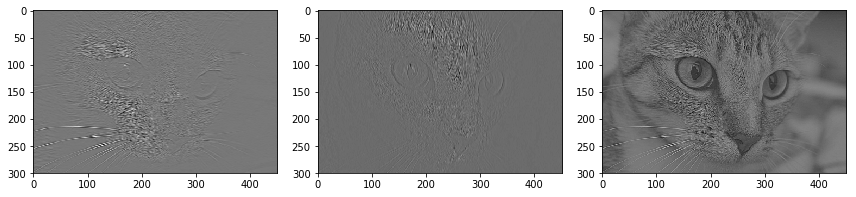

In [16]:
kernel2=np.array([[-1,-1,-1],[2,2,2], [-1,-1,-1]]) #horizontal edges
kernel3=np.array([[-1,2,-1],[-1,2,-1], [-1,2,-1]]) #vertical edges
image_kernel2=convolve(grayscale_image, kernel2)
image_kernel3=convolve(grayscale_image, kernel3)

fig, axes = plt.subplots(1, 3, figsize=(12, 8))
ax = axes.ravel()
ax[0].imshow(image_kernel2,cmap=plt.cm.gray)
ax[1].imshow(image_kernel3,cmap=plt.cm.gray)
ax[2].imshow(image_kernel1,cmap=plt.cm.gray)
fig.tight_layout()
plt.show()

In [45]:
kernel2=np.array([[-1,-1,-1],[2,2,2], [-1,-1,-1]])
x=np.array([[1,1,1,0,0],
            [0,1,1,1,0], 
            [0,0,1,1,1], 
            [0,0,0,1,1], 
            [0,0,1,1,0],])
convolve(x, kernel) #includes padding

array([[ 2,  1, -1, -1, -1],
       [-1,  0,  2,  0, -1],
       [-1,  0,  0,  2,  2],
       [ 0, -2, -2, -1,  2],
       [ 0,  1,  1,  0, -2]])

In [46]:
#numpy slicing
i=1
j=1
x[i:i+3, j:j+3]


array([[1, 1, 1],
       [0, 1, 1],
       [0, 0, 1]])

In [47]:
result = np.zeros([3,3])
for i in range(0,3):
    for j in range(0,3):
        result[i,j]=np.sum(np.multiply(x[i:i+3, j:j+3], kernel2))
result

array([[ 0.,  2.,  0.],
       [ 0.,  0.,  2.],
       [-2., -2., -1.]])